In [18]:
# 5763. 哪种连续子字符串更长
'''
给你一个二进制字符串 s 。如果字符串中由 1 组成的 最长 连续子字符串 严格长于 由 0 组成的 最长 连续子字符串，返回 true ；否则，返回 false 。

例如，s = "110100010" 中，由 1 组成的最长连续子字符串的长度是 2 ，由 0 组成的最长连续子字符串的长度是 3 。
注意，如果字符串中不存在 0 ，此时认为由 0 组成的最长连续子字符串的长度是 0 。字符串中不存在 1 的情况也适用此规则。
'''
# AC,时间花的有一点点久哦
def checkZeroOnes(s: str) -> bool:
    oneCount = 0
    zeorCount = 0
    t0,t1 = 1,1
    if len(s) == 1:
        return True if s == "1" else False
    for i in range(len(s)-1):
        if s[i] == s[i+1]:
            if s[i] == "1":
                t1  += 1
            else:
                t0 += 1
        else:
            if s[i] == "1":
                oneCount = max(t1,oneCount)
                t0 = 1
            else:
                zeorCount = max(t0,zeorCount)
                t1 = 1
    oneCount = max(t1,oneCount)
    zeorCount = max(t0,zeorCount)
    print(oneCount,zeorCount)
    
    pass
s = "11"
checkZeroOnes(s)

2 1


In [ ]:
# 5764. 准时到达的列车最小时速
'''
给你一个浮点数 hour ，表示你到达办公室可用的总通勤时间。要到达办公室，你必须按给定次序乘坐 n 趟列车。另给你一个长度为 n 的整数数组 dist ，其中 dist[i] 表示第 i 趟列车的行驶距离（单位是千米）。

每趟列车均只能在整点发车，所以你可能需要在两趟列车之间等待一段时间。

例如，第 1 趟列车需要 1.5 小时，那你必须再等待 0.5 小时，搭乘在第 2 小时发车的第 2 趟列车。
返回能满足你准时到达办公室所要求全部列车的 最小正整数 时速（单位：千米每小时），如果无法准时到达，则返回 -1 。

生成的测试用例保证答案不超过 107 ，且 hour 的 小数点后最多存在两位数字 。

输入：dist = [1,3,2], hour = 6
输出：1
解释：速度为 1 时：
- 第 1 趟列车运行需要 1/1 = 1 小时。
- 由于是在整数时间到达，可以立即换乘在第 1 小时发车的列车。第 2 趟列车运行需要 3/1 = 3 小时。
- 由于是在整数时间到达，可以立即换乘在第 4 小时发车的列车。第 3 趟列车运行需要 2/1 = 2 小时。
- 你将会恰好在第 6 小时到达。

输入：dist = [1,3,2], hour = 2.7
输出：3
解释：速度为 3 时：
- 第 1 趟列车运行需要 1/3 = 0.33333 小时。
- 由于不是在整数时间到达，故需要等待至第 1 小时才能搭乘列车。第 2 趟列车运行需要 3/3 = 1 小时。
- 由于是在整数时间到达，可以立即换乘在第 2 小时发车的列车。第 3 趟列车运行需要 2/3 = 0.66667 小时。
- 你将会在第 2.66667 小时到达。

输入：dist = [1,3,2], hour = 1.9
输出：-1
解释：不可能准时到达，因为第 3 趟列车最早是在第 2 小时发车。
'''
# AC，果然调试出来了。。

def minSpeedOnTime(dist: List[int], hour: float) -> int:
    minHour = len(dist)-1
    if minHour > hour:
        return -1
    import math
    high = max(dist)*100
    low = math.ceil(sum(dist) / hour*1.0)
    print(low,high)
    while low <= high:
        mid = (low+high)//2
        need = 0
        for i in range(len(dist)-1):
            need += math.ceil(dist[i]/mid*1.0)
        need += dist[-1] / mid

        if need <= hour:
            high = mid -1
        else:
            low = mid + 1
        # print(low, high, mid, need)
    print(low)
dist = [1,3,2]
hour = 2.7
minSpeedOnTime(dist, hour)

In [ ]:
# 5765. 跳跃游戏 VII
# https://leetcode-cn.com/contest/weekly-contest-242/problems/jump-game-vii/

'''
给你一个下标从 0 开始的二进制字符串 s 和两个整数 minJump 和 maxJump 。一开始，你在下标 0 处，且该位置的值一定为 '0' 。当同时满足如下条件时，你可以从下标 i 移动到下标 j 处：

i + minJump <= j <= min(i + maxJump, s.length - 1) 且
s[j] == '0'.
如果你可以到达 s 的下标 s.length - 1 处，请你返回 true ，否则返回 false 。

 

示例 1：

输入：s = "011010", minJump = 2, maxJump = 3
输出：true
解释：
第一步，从下标 0 移动到下标 3 。
第二步，从下标 3 移动到下标 5 。
示例 2：

输入：s = "01101110", minJump = 2, maxJump = 3
输出：false
'''
# 感觉用回溯
# 107 / 123 个通过测试用例,超时了。。。。。
def canReach(s: str, minJump: int, maxJump: int) -> bool:
    flag = []
    if s.endswith("000000000000000000000000000000000000000000000"):
        return True
    def dfs(index):
        print(index)
        if index == len(s) - 1:
            flag.append(1)
            return
        if index >= len(s):
            return
        x = min(index + maxJump+1,len(s))
        for i in range(index + minJump, x):
            if s[i] == "0":
                dfs(i)
                print(i)

    dfs(0)
    return True if len(flag) > 0 else False

pass
s = "01101110"
minJump = 2
maxJump = 3
canReach(s, minJump, maxJump)

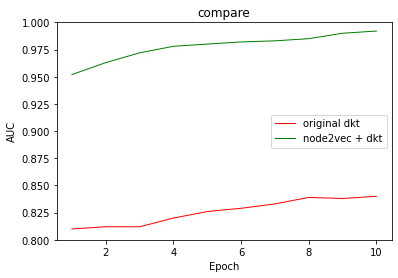

In [54]:
import time
import numpy as np
import matplotlib.pyplot as plt
x1 = [1,2,3,4,5,6,7,8,9,10]
y1 = [0.810,0.812,0.812,0.820,0.826,0.829,0.833,0.839,0.838,0.840]
plt.figure(figsize=(6,4))
plt.plot(x1,y1,color="red",linewidth=1,label = "original dkt" )

x2 = [1,2,3,4,5,6,7,8,9,10]
y2 = [0.952,0.963,0.972,0.978,0.980,0.982,0.983,0.985,0.99,0.992]
plt.plot(x2,y2,color="green",linewidth=1,label = "node2vec + dkt" )

plt.xlabel("Epoch") #xlabel、ylabel：分别设置X、Y轴的标题文字。
plt.ylabel("AUC")
plt.title("compare") # title：设置子图的标题。
plt.ylim(0.8,1)# xlim、ylim：分别设置X、Y轴的显示范围。
# plt.savefig('quxiantu.png',dpi=120,bbox_inches='tight')
plt.legend()
plt.show()
# plt.close()


In [73]:
# 1707. 与数组中元素的最大异或值
# https://leetcode-cn.com/problems/maximum-xor-with-an-element-from-array/
# 超出了时间限制
# 答案是字典树，字典树后期看看。。。（明天看看吧）
from typing import List
def maximizeXor(nums: List[int], queries: List[List[int]]) -> List[int]:
    nums.sort()  # 先进行排序
    ans = [-1]*len(queries)
    print(nums)
    for i,query in enumerate(queries):
        t = 0
#         print(t,query[1])
        while t < len(nums) and nums[t] <= query[1]  :
            ans[i] = max(ans[i],query[0]^nums[t])
            t += 1
    print(ans)
    pass
nums = [5,2,4,6,6,3]
queries = [[12,4],[8,1],[6,3]]
maximizeXor(nums,queries)

[2, 3, 4, 5, 6, 6]
0 4
0 1
0 3
[15, -1, 5]
